In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [49]:
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('ADDYY.csv', header=0, parse_dates=[0], index_col=0)

In [50]:
 #2. Đọc file csv và gắng index với giá Close
df1 = df.reset_index()['Close']

In [51]:
df1 = df1.dropna()

In [52]:
# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
#train-test (7-3)

In [54]:
# 4. Chia train test 7-3
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [55]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [56]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [57]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [58]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [59]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 162ms/step - loss: 0.1574 - val_loss: 0.0041
Epoch 2/100
13/13 [==============================] - 1s 83ms/step - loss: 0.0199 - val_loss: 0.0354
Epoch 3/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0101 - val_loss: 0.0163
Epoch 4/100
13/13 [==============================] - 1s 85ms/step - loss: 0.0076 - val_loss: 0.0099
Epoch 5/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0064 - val_loss: 0.0083
Epoch 6/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0053 - val_loss: 0.0043
Epoch 7/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 8/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/100
13/13 [==============================] - 1s 88ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 10/100
13/13 [==============================] - 1s 92ms/step - loss: 0.0038 - val_loss: 0.001

In [60]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 19ms/step


In [61]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [62]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 87.41571686903417
Testing MAPE: 338.98275643060754
Testing MAE: 86.71616832033561
Testing MSE: 7639.902262715462


In [63]:
test_data.shape

(378, 1)

In [64]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [65]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[278:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.37604484]
101
1 day input [0.33829483 0.35579059 0.33920878 0.33855597 0.34142842 0.35572529
 0.35598643 0.35552945 0.36062149 0.35474604 0.33561827 0.32510775
 0.32654393 0.33176656 0.34900118 0.35650871 0.35690038 0.35448496
 0.34253821 0.34064501 0.31877532 0.3172738  0.32869827 0.31335685
 0.30036561 0.29795013 0.3074161  0.29338036 0.2818253  0.28019324
 0.26472127 0.26824649 0.26178352 0.2514036  0.24585459 0.24311268
 0.27588461 0.2641337  0.25153415 0.26250164 0.24317797 0.25492887
 0.28038908 0.28868    0.29070375 0.28424078 0.27686386 0.2917483
 0.32060323 0.3074814  0.29925577 0.28965926 0.2878313  0.29827656
 0.28998564 0.27457893 0.27438308 0.28241287 0.28208644 0.28371851
 0.29892938 0.29905993 0.30480483 0.30611047 0.29736261 0.30395613
 0.30487008 0.29808073 0.33907824 0.33653222 0.32961222 0.34371331
 0.35337511 0.36225356 0.36884712 0.36290638 0.36538715 0.37178483
 0.39241418 0.38758327 0.39404624 0.39228358 0.39110854 0.39339342
 0.37779087 0.38262178 0.38679986 

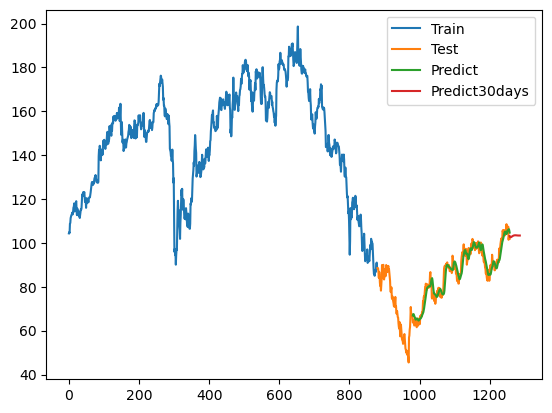

In [66]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [67]:
#train-test (8-2)

In [68]:
# 4. Chia train test 8-2
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [69]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [70]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [71]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [72]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 163ms/step - loss: 0.1352 - val_loss: 0.0013
Epoch 2/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0181 - val_loss: 0.0140
Epoch 3/100
15/15 [==============================] - 1s 86ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 4/100
15/15 [==============================] - 1s 82ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 5/100
15/15 [==============================] - 1s 82ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 6/100
15/15 [==============================] - 1s 86ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 7/100
15/15 [==============================] - 1s 87ms/step - loss: 0.0032 - val_loss: 0.0018
Epoch 8/100
15/15 [==============================] - 1s 96ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 9/100
15/15 [==============================] - 1s 99ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 10/100
15/15 [==============================] - 2s 106ms/step - loss: 0.0031 - val_loss: 0.00

In [74]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 16ms/step


In [75]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [76]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 92.94146111594578
Testing MAPE: 291.2059193876089
Testing MAE: 92.72878625236848
Testing MSE: 8637.609935908516


In [77]:
test_data.shape

(252, 1)

In [78]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[152:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.36110863]
101
1 day input [0.33829483 0.35579059 0.33920878 0.33855597 0.34142842 0.35572529
 0.35598643 0.35552945 0.36062149 0.35474604 0.33561827 0.32510775
 0.32654393 0.33176656 0.34900118 0.35650871 0.35690038 0.35448496
 0.34253821 0.34064501 0.31877532 0.3172738  0.32869827 0.31335685
 0.30036561 0.29795013 0.3074161  0.29338036 0.2818253  0.28019324
 0.26472127 0.26824649 0.26178352 0.2514036  0.24585459 0.24311268
 0.27588461 0.2641337  0.25153415 0.26250164 0.24317797 0.25492887
 0.28038908 0.28868    0.29070375 0.28424078 0.27686386 0.2917483
 0.32060323 0.3074814  0.29925577 0.28965926 0.2878313  0.29827656
 0.28998564 0.27457893 0.27438308 0.28241287 0.28208644 0.28371851
 0.29892938 0.29905993 0.30480483 0.30611047 0.29736261 0.30395613
 0.30487008 0.29808073 0.33907824 0.33653222 0.32961222 0.34371331
 0.35337511 0.36225356 0.36884712 0.36290638 0.36538715 0.37178483
 0.39241418 0.38758327 0.39404624 0.39228358 0.39110854 0.39339342
 0.37779087 0.38262178 0.38679986 

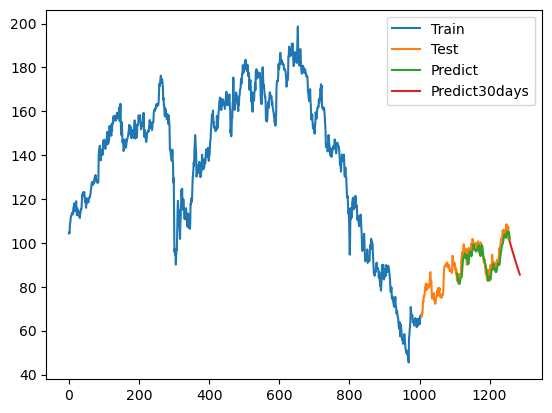

In [80]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [81]:
#train-test (9-1)

In [82]:
# 4. Chia train test 9-1
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

In [83]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 \n",
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [84]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
#X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [85]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], time_step, 1)

In [86]:
# Hàm LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 7s 146ms/step - loss: 0.0710 - val_loss: 0.0017
Epoch 2/100
17/17 [==============================] - 1s 74ms/step - loss: 0.0109 - val_loss: 0.0013
Epoch 3/100
17/17 [==============================] - 1s 75ms/step - loss: 0.0066 - val_loss: 0.0030
Epoch 4/100
17/17 [==============================] - 1s 75ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 5/100
17/17 [==============================] - 1s 74ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 6/100
17/17 [==============================] - 1s 72ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 7/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 8/100
17/17 [==============================] - 1s 78ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 9/100
17/17 [==============================] - 1s 80ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 10/100
17/17 [==============================] - 1s 84ms/step - loss: 0.0030 - val_loss: 0.002

In [88]:
# 10. Dự báo dữ liệu test, val
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
#y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 33ms/step


In [89]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)
#y_pred_val=scaler.inverse_transform(y_pred_val)

In [90]:
 # 12. Đánh giá độ chính xác thuật toán bằng RMSE
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, r2_score, mean_squared_error
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 8+. Tính MAPE 
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# 8+. Tính MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# MSE
test_mse = mean_squared_error(y_test, y_pred)
print('Testing MSE:', test_mse)

Testing RMSE: 101.50802892135593
Testing MAPE: 264.1886285103283
Testing MAE: 101.48575658019259
Testing MSE: 10303.847262378724


In [91]:
test_data.shape

(126, 1)

In [92]:
x_input=test_data[26:].reshape(1,-1)
x_input.shape

(1, 100)

In [93]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[26:].reshape(1,-1)
x_input.shape
        
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
    
from numpy import array
        
lst_output=[]
n_steps=100
i=0
while(i<30):
            
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        n_steps = min(len(temp_input), 100)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.35366362]
101
1 day input [0.33829483 0.35579059 0.33920878 0.33855597 0.34142842 0.35572529
 0.35598643 0.35552945 0.36062149 0.35474604 0.33561827 0.32510775
 0.32654393 0.33176656 0.34900118 0.35650871 0.35690038 0.35448496
 0.34253821 0.34064501 0.31877532 0.3172738  0.32869827 0.31335685
 0.30036561 0.29795013 0.3074161  0.29338036 0.2818253  0.28019324
 0.26472127 0.26824649 0.26178352 0.2514036  0.24585459 0.24311268
 0.27588461 0.2641337  0.25153415 0.26250164 0.24317797 0.25492887
 0.28038908 0.28868    0.29070375 0.28424078 0.27686386 0.2917483
 0.32060323 0.3074814  0.29925577 0.28965926 0.2878313  0.29827656
 0.28998564 0.27457893 0.27438308 0.28241287 0.28208644 0.28371851
 0.29892938 0.29905993 0.30480483 0.30611047 0.29736261 0.30395613
 0.30487008 0.29808073 0.33907824 0.33653222 0.32961222 0.34371331
 0.35337511 0.36225356 0.36884712 0.36290638 0.36538715 0.37178483
 0.39241418 0.38758327 0.39404624 0.39228358 0.39110854 0.39339342
 0.37779087 0.38262178 0.38679986 

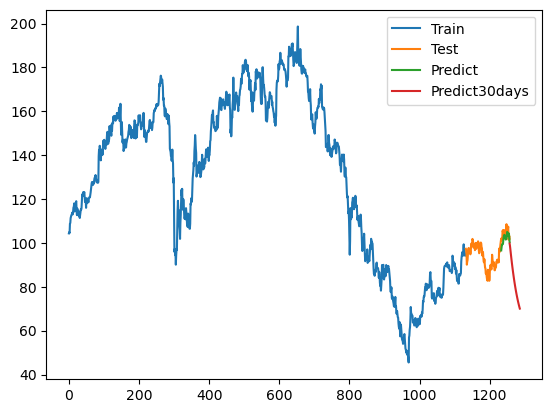

In [94]:
#Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=len(df1), step=1)
plt.plot(test_data_index,(y_pred))
#val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,scaler.inverse_transform(val_data))
#val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
#plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()